In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches
import pandas as pd
from matplotlib import font_manager
import os

In [2]:
# set working directory
root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Data prep

In [4]:
#load preprocessed data
df = pd.read_csv(os.path.join(root, "data\\people-carousel-data.csv"))

In [5]:
#reduce number of columns
df = df[["name", "gender", "eye_color", "height", "mass", "planet name", "no_films", 'episode 1',
       'episode 2', 'episode 3', 'episode 4', 'episode 5', 'episode 6']]


#create dummy variables for appearances
episodes = ['episode 1', 'episode 2', 'episode 3', 'episode 4', 'episode 5', 'episode 6']
df[episodes] = df[episodes].fillna(0)
for episode in episodes:
    df[episode] = [1 if x!=0 else 0 for x in df[episode]]
    
df['films'] = df[episodes].values.tolist()

In [6]:
#select 15 characters
df = df[df["name"].isin(['C-3PO', 'R2-D2', 'Obi-Wan Kenobi', 'Yoda',  'Palpatine', 'Luke Skywalker', 
                               'Darth Vader', 'Leia Organa', 'Chewbacca', 'Anakin Skywalker', 
                               'Jabba Desilijic Tiure','Padmé Amidala','Mace Windu','Boba Fett','Han Solo'])]

#sort table and reindex
df = df.reset_index(drop=True)
df = df.reset_index()
df = df.sort_values(by="index", ascending = False)

#fill missing gender
df["gender"] = df["gender"].fillna("—")

#reclassify Jabba's gender as male
df.loc[df["name"]=="Jabba Desilijic Tiure", "gender"] = "male*"

In [13]:
#save data as dict
data = df[[ 'name', 'gender', 'eye_color', 'height', 'mass', 'planet name']].to_dict('records')
data_films = df[["index", "name", "films"]].sort_values(by="index").to_dict('records')

## Create table

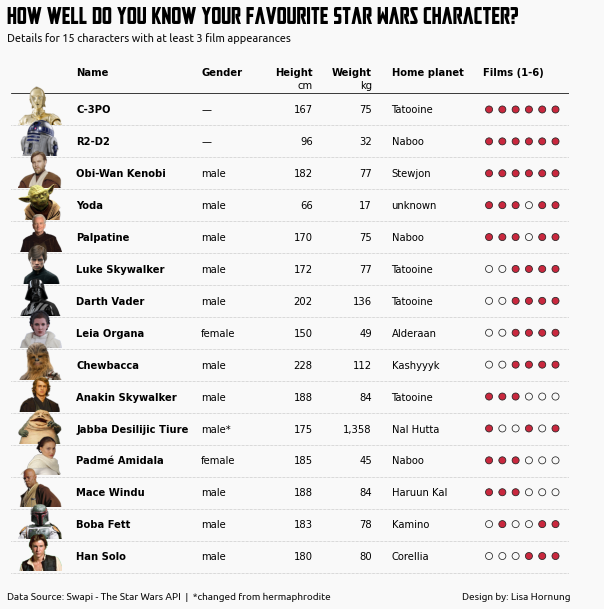

In [18]:
# ========
# INPUTS

#font stylings
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Ubuntu-R.ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Mandalore-K77lD.otf')
annot_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Raleway-SemiBold.ttf')

#colors
offwhite = "#f9f9f9"
circles = {0:offwhite, 1:"#C9283E"}

#C3662D"
# =========
# SETUP
# create a new figure and axis object
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor(offwhite)
ax.patch.set_alpha(0)


# set the number of rows and cols for our table
rows = 15
cols = 8

# create a coordinate system based on the number of rows/columns
# adding a bit of padding on bottom (-1), top (1), right (0.5)
ax.set_ylim(-1, rows + 1)
ax.set_xlim(0, cols + .5)

#=======
# ADD TEXT

for row in range(rows):

# extract the row data from the list
    d = data[row]

    # the y (row) coordinate is based on the row index (loop)
    # the x (column) coordinate is defined based on the order I want to display the data in

    # player name column
    ax.text(x=1, y=row, s=d['name'], va='center', ha='left',fontweight='bold') 
    
    # gender
    ax.text(x=2.9, y=row, s=d['gender'], va='center',ha='left')
    
    # height
    ax.text(x=4.6, y=row, s=d['height'], va='center', ha='right')
    
    # mass
    ax.text(x=5.5, y=row, s=d['mass'], va='center', ha='right')
    
    # planet name
    ax.text(x=5.8, y=row, s=d['planet name'], va='center', ha='left')

#Add header row

ax.text(1, rows, 'Name', weight='bold', ha='left', va='bottom')
ax.text(2.9, rows, 'Gender', weight='bold', ha='left', va='bottom')
ax.text(4.6, rows, 'Height', weight='bold', ha='right', va='bottom')
ax.text(5.5, rows, 'Weight', weight='bold', ha='right', va='bottom')
ax.text(5.8, rows, 'Home planet', weight='bold', ha='left', va='bottom')
ax.text(7.2, rows, 'Films (1-6)', weight='bold', ha='left', va='bottom')
 
ax.text(4.6, rows-0.4, 'cm', weight='normal', ha='right', va='bottom')
ax.text(5.5, rows-0.4, 'kg', weight='normal', ha='right', va='bottom')
    
# ===========
# STYLING

#add lines between rows
for row in range(rows):
    ax.plot(
    [0, cols + 1],
    [row -.5, row - .5],
    ls=':',
    lw='.5',
    c='grey'
    )

#add line underneath headers
ax.plot([0, cols + 1], [rows - 0.5, rows - 0.5], lw='.75', c='black')

#remove frame
ax.axis('off')

#===========
# Film column

#add axes for circles
filmaxes = []
for row in range(rows):
    # offset each new axes by a set amount depending on the row
    filmaxes.append(
        fig.add_axes([.78, .77 - (row*.0443), .12, .042])
    )

for row in range(rows):
# extract the row data from the list
    d = data_films[row]
    filmaxes[row].scatter([1,2,3,4,5,6], [1,1,1,1,1,1], s=50, edgecolor="#222222", linewidth=0.75
                    , c=[circles[d["films"][0]],circles[d["films"][1]], circles[d["films"][2]],
                        circles[d["films"][3]], circles[d["films"][4]], circles[d["films"][5]]]
                   )
#style axes
for axes in filmaxes:
    axes.set_xlim(xmin=0.5, xmax=7)
    axes.axis('off')
    axes.patch.set_alpha(0)
    
    
#===========
# IMAGES

#add axes for images
newaxes = []
for row in range(rows):
    # offset each new axes by a set amount depending on the row
    newaxes.append(
       fig.add_axes([.13, .77 - (row*.0443), .07, .06])
    )
    
#give list of image files
images = ["C3PO_sq.png", "R2D2_sq.png", "obiwan_sq.png", "yoda_sq.png", "palpatine_sq.png",
          "luke_sq.png", "vader_sq.png", "leia_sq.png", "chewbacca_sq.png", "anakin_sq.png",
          "jabba_sq.png", "padme_sq.png", "mace_sq.png", "boba_sq.png", "hansolo_sq.png"
         ]

#insert images into the axes
for row in range(rows):
    image = plt.imread(os.path.join(root, "assets\\", images[row]))
    newaxes[row].imshow(image)

#remove frame for axes
for axes in newaxes:
    axes.axis('off')

    
# ============
# Add title
plt.figtext(0.12,0.91,'How well do you know your favourite Star Wars character?',
         fontsize = 24, weight = 'bold', fontproperties=title_font, color='black')
plt.figtext(0.12,0.885, "Details for 15 characters with at least 3 film appearances", 
            fontsize=11, ha='left',  color="#111111", fontproperties=label_font)

#footer
plt.figtext(0.12,0.11, "Data Source: Swapi - The Star Wars API  |  *changed from hermaphrodite", fontsize=10,
            ha='left', color="#111111", fontproperties=label_font)
plt.figtext(0.94,0.11, "Design by: Lisa Hornung            ",
            fontsize=10, ha='right', color="#111111", fontproperties=label_font)
    

# save outfile
plt.savefig(os.path.join(root, "outputs//main-star-wars-characters-table.png"), bbox_inches="tight",pad_inches=0.2)
    
plt.show()